<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Projects 1 // Publication-Grade Plot</font></h1>

Title: Hacktiv8 PTP Introduction to Data Science Projects 1: Publication-Grade Plot\
Last Updated: April 2nd, 2022 \
Author: Nabilah Adani

## Publication-grade Plot Introduction

The aim of this projects is to introduce you to data visualization with Python as concrete and as consistent as possible. Using what you’ve learned; download the London Crime Dataset from Kaggle. This dataset is a record of crime in major metropolitan areas, such as London, occurs in distinct patterns. This data covers the number of criminal reports by month, LSOA borough, and major/minor category from Jan 2008-Dec 2016.

This dataset contains:

* `lsoa_code`: this represents a policing area
* `borough`: the london borough for which the statistic is related
* `major_category`: the major crime category
* `minor_category`: the minor crime category
* `value`: the count of the crime for that particular borough, in that particular month
* `year`: the year of the summary statistic
* `month`: the month of the summary statistic

Formulate a question and derive a statistical hypothesis test to answer the question. You have to demonstrate that you’re able to make decisions using data in a scientific manner. And the important things, visualized the data.

Please make sure that you have completed the session for this course, namely Advanced Visualization which is part of this Program.

Note: You can take a look at Project Rubric below:

Criteria |	Meet Expectations
---|---
Area Plot |	Mengimplementasikan Area Plot Menggunakan `Matplotlib` Dengan Data Yang Relevan Dan Sesuai Dengan Kegunaan Plot/Grafik
Histogram |	Mengimplementasikan Histogram Menggunakan `Matplotlib` Dengan Data Yang Relevan Dan Sesuai Dengan Kegunaan Plot/Grafik.
Bar Chart | Mengimplementasikan Bar Chart Menggunakan `Matplotlib` Dengan Data Yang Relevan Dan Sesuai Dengan Kegunaan Plot/Grafik.
Pie Chart |	Mengimplementasikan Pie Chart Menggunakan `Matplotlib` Dengan Data Yang Relevan Dan Sesuai Dengan Kegunaan Plot/Grafik.
Box Plot |	Mengimplementasikan Box Plot Menggunakan `Matplotlib` Dengan Data Yang Relevan Dan Sesuai Dengan Kegunaan Plot/Grafik.
Scatter Plot |	Mengimplementasikan Scatter Plot Menggunakan `Matplotlib` Dengan Data Yang Relevan Dan Sesuai Dengan Kegunaan Plot/Grafik.
Word Clouds |	Mengimplementasikan Word Clouds Menggunakan `Wordclouds` Library Dengan Data Yang Relevan Dan Sesuai Dengan Kegunaan Plot/Grafik.
Folium Maps |	Mengimplementasikan London Maps Menggunakan `Folium`.
Preprocessing |	Student Melakukan Preproses Dataset Sebelum Menerapkan Visualisasi. | | Apakah Kode Berjalan Tanpa Ada Eror?
Apakah Kode Berjalan Tanpa Ada Eror? |	Seluruh Kode Berfungsi Dan Dibuat Dengan Benar.
Area Plot |	Menarik Informasi/Kesimpulan Berdasarkan Area Plot Yang Telah Student Buat
Histogram |	Menarik Informasi/Kesimpulan Berdasarkan Histogram Yang Telah Student Buat
Bar Chart |	Menarik Informasi/Kesimpulan Berdasarkan Bar Chart Yang Telah Student Buat
Pie Chart |	Menarik Informasi/Kesimpulan Berdasarkan Pie Chart Yang Telah Student Buat
Box Plot |	Menarik Informasi/Kesimpulan Berdasarkan Box Plot Yang Telah Student Buat
Scatter Plot |	Menarik Informasi/Kesimpulan Berdasarkan Scatter Plot Yang Telah Student Buat
Overall Analysis |	Menarik Informasi/Kesimpulan Dari Keseluruhan Plot Yang Dapat Menjawab Hipotesis.

------------

# I. Exploring Dataset with Pandas

In [1]:
# import required packages to handle data
import numpy as np
import pandas as pd

# import packages for visualization
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['default'])

# import packages for map using folium
import folium
from folium import plugins

# import package for wordcloud
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [2]:
# read CSV file
# the dataset was downloaded from https://www.kaggle.com/datasets/jboysen/london-crime
# the dataset is London Crime Data, 2008-2016. see intro for full information on each column.

df_ldn_crime = pd.read_csv("dataset/london_crime_by_lsoa.csv")
df_ldn_crime.head()

lsoa_code     borough               major_category  \
0  E01001116     Croydon                     Burglary   
1  E01001646   Greenwich  Violence Against the Person   
2  E01000677     Bromley  Violence Against the Person   
3  E01003774   Redbridge                     Burglary   
4  E01004563  Wandsworth                      Robbery   

                minor_category  value  year  month  
0  Burglary in Other Buildings      0  2016     11  
1               Other violence      0  2016     11  
2               Other violence      0  2015      5  
3  Burglary in Other Buildings      0  2016      3  
4            Personal Property      0  2008      6

## I. 1. Data cleaning with Pandas

In [3]:
# check if there's any null value. in this case, already good.

df_ldn_crime.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [4]:
# re-read CSV file, but discard all 0 in "value" column
# "value" = 0 is dicarded because it indicates that for that particular time, the crime did not occur in the borough

df_ldn_crime = pd.read_csv("dataset/london_crime_by_lsoa.csv", na_values=0)
df_ldn_crime = df_ldn_crime.dropna()
df_ldn_crime.head()

lsoa_code               borough               major_category  \
9   E01004177                Sutton           Theft and Handling   
16  E01000086  Barking and Dagenham           Theft and Handling   
24  E01001301                Ealing           Theft and Handling   
25  E01001794               Hackney  Violence Against the Person   
32  E01000733               Bromley              Criminal Damage   

                      minor_category  value  year  month  
9        Theft/Taking of Pedal Cycle    1.0  2016      8  
16                Other Theft Person    1.0  2009      5  
24                Other Theft Person    2.0  2012      1  
25                        Harassment    1.0  2013      2  
32  Criminal Damage To Motor Vehicle    1.0  2016      4

In [5]:
# notice that the index does not start in 0 because we dropped several rows earlier
# reset the index so that it starts from 0
# no column has unique values, therefore index is not assigned to any column, just using chronological number

df_ldn_crime.reset_index(inplace=True)

# notice also that 'value' column was written as float type
# change the "value" column into int, not float, since the decimal (.0) is redundant

df_ldn_crime['value'] = df_ldn_crime['value'].astype(int)
df_ldn_crime.head()

index  lsoa_code               borough               major_category  \
0      9  E01004177                Sutton           Theft and Handling   
1     16  E01000086  Barking and Dagenham           Theft and Handling   
2     24  E01001301                Ealing           Theft and Handling   
3     25  E01001794               Hackney  Violence Against the Person   
4     32  E01000733               Bromley              Criminal Damage   

                     minor_category  value  year  month  
0       Theft/Taking of Pedal Cycle      1  2016      8  
1                Other Theft Person      1  2009      5  
2                Other Theft Person      2  2012      1  
3                        Harassment      1  2013      2  
4  Criminal Damage To Motor Vehicle      1  2016      4

In [6]:
# drop the 'index' column since it now has no use (see printed result above)
# lsoa_code is also not going to be used, since the values are not all unique thus cannot be used as index, also will not be used for data visualization

df_ldn_crime.drop(columns=['index', 'lsoa_code'], inplace=True)
df_ldn_crime.head()

borough               major_category  \
0                Sutton           Theft and Handling   
1  Barking and Dagenham           Theft and Handling   
2                Ealing           Theft and Handling   
3               Hackney  Violence Against the Person   
4               Bromley              Criminal Damage   

                     minor_category  value  year  month  
0       Theft/Taking of Pedal Cycle      1  2016      8  
1                Other Theft Person      1  2009      5  
2                Other Theft Person      2  2012      1  
3                        Harassment      1  2013      2  
4  Criminal Damage To Motor Vehicle      1  2016      4

In [7]:
# check if the data types are correct. in this case, already good.

print(df_ldn_crime.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3419099 entries, 0 to 3419098
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   borough         object
 1   major_category  object
 2   minor_category  object
 3   value           int32 
 4   year            int64 
 5   month           int64 
dtypes: int32(1), int64(2), object(3)
memory usage: 143.5+ MB
None


In [8]:
# add one more column that indicates the combination of month and year
# we will assume the date is always the 1st of the month

df_ldn_crime['date'] = pd.to_datetime(df_ldn_crime[['year', 'month']].assign(day=1))
df_ldn_crime.head()

borough               major_category  \
0                Sutton           Theft and Handling   
1  Barking and Dagenham           Theft and Handling   
2                Ealing           Theft and Handling   
3               Hackney  Violence Against the Person   
4               Bromley              Criminal Damage   

                     minor_category  value  year  month       date  
0       Theft/Taking of Pedal Cycle      1  2016      8 2016-08-01  
1                Other Theft Person      1  2009      5 2009-05-01  
2                Other Theft Person      2  2012      1 2012-01-01  
3                        Harassment      1  2013      2 2013-02-01  
4  Criminal Damage To Motor Vehicle      1  2016      4 2016-04-01

## I. 2. Check the unique values in each column

In [9]:
# check the number of unique values in each column to understand the data better

print('borough', df_ldn_crime['borough'].nunique())
print('major_category', df_ldn_crime['major_category'].nunique())
print('minor_category', df_ldn_crime['minor_category'].nunique())
print('value', df_ldn_crime['value'].nunique())
print('year', df_ldn_crime['year'].nunique())
print('month', df_ldn_crime['month'].nunique())

borough 33
major_category 9
minor_category 32
value 246
year 9
month 12


In [10]:
# check the names of the boroughs

df_ldn_crime['borough'].value_counts()

Lambeth                   152784
Croydon                   147203
Southwark                 144362
Ealing                    140006
Newham                    137275
Brent                     129925
Lewisham                  128232
Barnet                    127194
Tower Hamlets             120099
Wandsworth                118995
Enfield                   117953
Hackney                   116521
Haringey                  116315
Waltham Forest            114603
Camden                    112029
Islington                 111755
Hillingdon                110614
Westminster               110070
Bromley                   109855
Hounslow                  106561
Redbridge                 105932
Greenwich                 104654
Hammersmith and Fulham     92084
Barking and Dagenham       86849
Havering                   82288
Kensington and Chelsea     81295
Harrow                     73993
Bexley                     73948
Merton                     73661
Sutton                     62776
Richmond u

In [11]:
# check the names of the major crime categories

df_ldn_crime['major_category'].value_counts()

Theft and Handling             1136994
Violence Against the Person     894859
Criminal Damage                 466268
Burglary                        441209
Drugs                           231894
Robbery                         163549
Other Notifiable Offences        80569
Fraud or Forgery                  2682
Sexual Offences                   1075
Name: major_category, dtype: int64

In [12]:
# check the names of the minor crime categories

print(df_ldn_crime['minor_category'].value_counts())
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')

Other Theft                               297281
Theft From Motor Vehicle                  291839
Burglary in a Dwelling                    278792
Assault with Injury                       244990
Harassment                                243827
Common Assault                            231398
Possession Of Drugs                       201464
Criminal Damage To Motor Vehicle          179380
Theft/Taking Of Motor Vehicle             163069
Burglary in Other Buildings               162417
Personal Property                         144078
Other Theft Person                        121674
Criminal Damage To Dwelling               121592
Other Criminal Damage                     112449
Theft/Taking of Pedal Cycle               104947
Theft From Shops                           94947
Wounding/GBH                               90482
Other Notifiable                           75483
Criminal Damage To Other Building          52847
Other violence                             50620
Motor Vehicle Interf

# II. Data Visualization with Matplotlib
- We will now visualize those data in different plots/other visuals according to specific question

## **II. 1 Overview Analysis**

In [13]:
# note that the required packages have been imported at the very beginning of the notebook

**Question #1:**
- What is the percentage of each major category crime throughout London greater area (all boroughs included) from 2008 to 2016?

### **Pie Chart**

In [14]:
# create a new series using groupby
# from the main dataframe, calculate summation of 'value' for each 'major_category'

total_maj_crime = df_ldn_crime.groupby('major_category')['value'].sum()
total_maj_crime

major_category
Burglary                        754293
Criminal Damage                 630938
Drugs                           470765
Fraud or Forgery                  5325
Other Notifiable Offences       106349
Robbery                         258873
Sexual Offences                   1273
Theft and Handling             2661861
Violence Against the Person    1558081
Name: value, dtype: int32

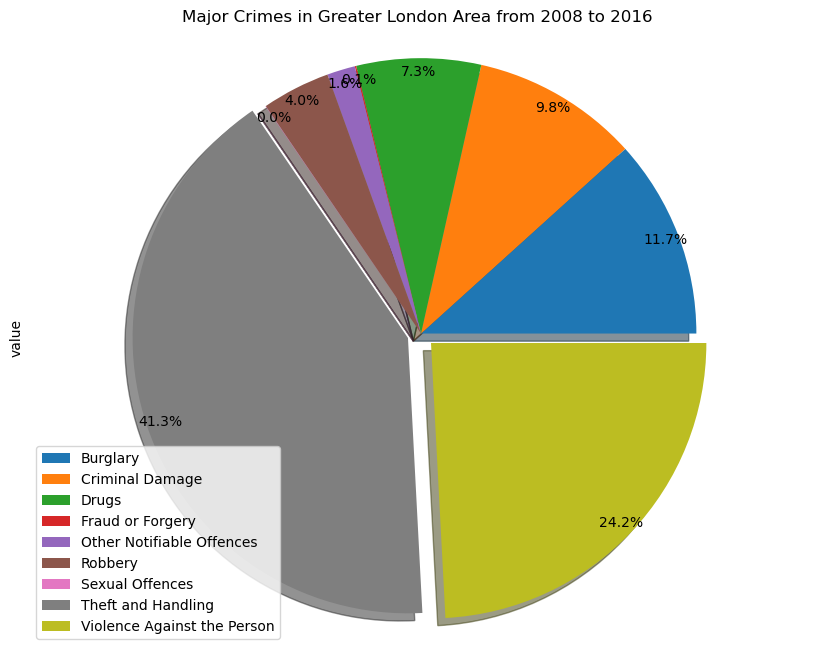

In [15]:
# plot the result above into a pie chart

mpl.style.use(['default'])
total_maj_crime.plot(kind="pie",
                     autopct='%1.1f%%',
                     pctdistance=0.95,
                     labels=None,
                     shadow=True,
                     explode=[0,0,0,0,0,0,0,0.05,0.05],
                    figsize=(10,8),
                    )
plt.title("Major Crimes in Greater London Area from 2008 to 2016",
         y=1
         )
plt.legend(total_maj_crime.index, loc="lower left")
plt.axis('equal')
plt.show()

**Analysis #1:**
- From the pie chart above, the most frequent crime cases from 2008 to 2016 in greater London area are **theft and handling** followed by **violence against a person**.
- The least frequent cases are Sexual Offences, Fraud/Forgery, and Other Notifiable Offences.

---

**Question #2:**
- What is the distribution of total crimes for each borough in greater London area from 2008 to 2016?

### **Bar Chart**

In [16]:
# create a new dataframe by grouping the summation of 'value' for each 'borough'
# we want to display it as bar chart, and we want to have them sorted in descending values
# therefore, we also sort the 'value' in the dataframe

df_total_per_borough = pd.DataFrame(df_ldn_crime.groupby('borough')['value'].sum()).sort_values('value')
df_total_per_borough.head()

value
borough                     
City of London           780
Kingston upon Thames   89306
Richmond upon Thames   96771
Sutton                100987
Bexley                114136

Text(0, 0.5, 'Total Cases')

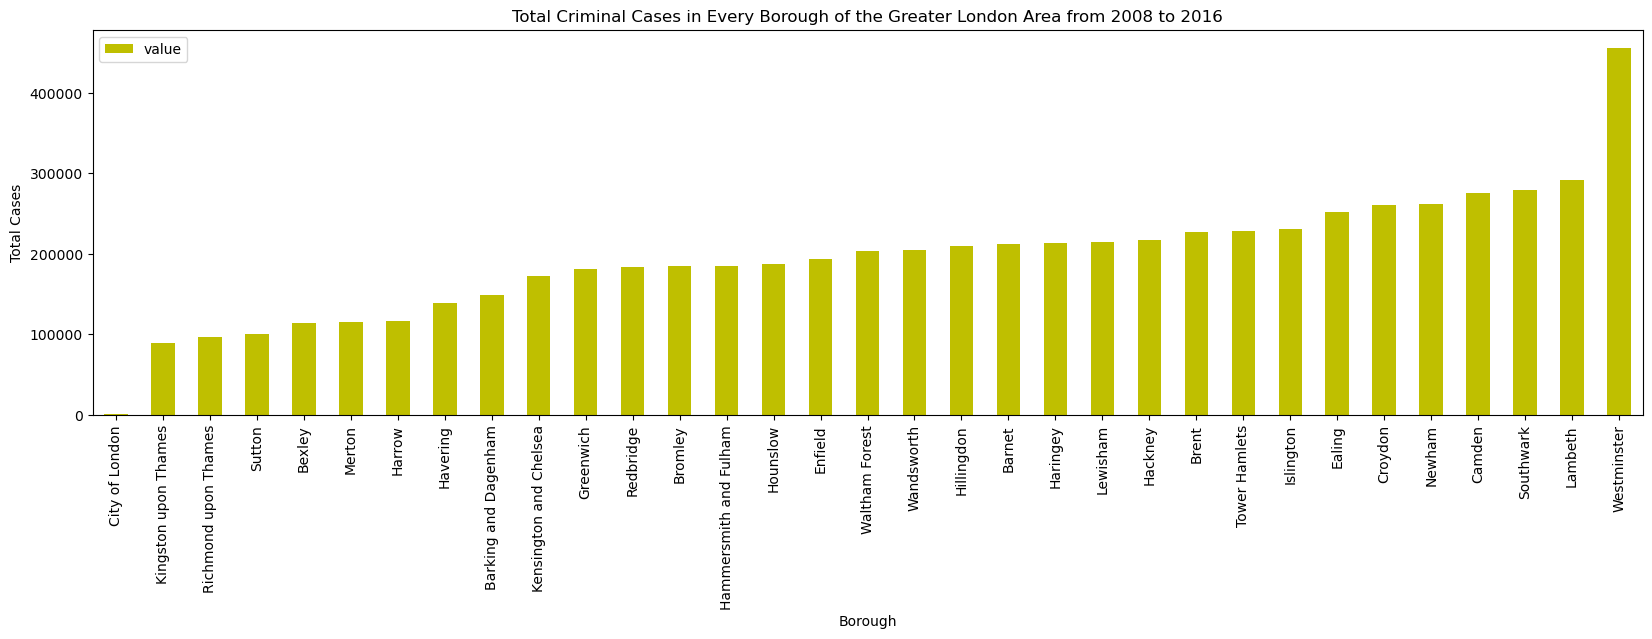

In [17]:
# create the bar plot

df_total_per_borough.plot(kind="bar",
                       figsize=(20,5),
                          color='y'
                       )

plt.title("Total Criminal Cases in Every Borough of the Greater London Area from 2008 to 2016")
plt.xlabel("Borough")
plt.ylabel("Total Cases")

**Analysis #2:**
- Westminster has the highest number of criminal cases. Interestingly, it is not even in the top 10 most populated boroughs of London (https://www.citypopulation.de/en/uk/greaterlondon/). However, considering the density, the area is in the top 10 of the densest borough in London (https://www.findahood.com/articles/property/londons-top-10-most-crowded-boroughs/13). Westminster is also one of the most famous tourist desinations in London.
- City of London has the lowest number of cases. This is probably due to it being the least populated borough in London, and one of the least dense as well, despite the area being one of the most famous tourist destinations in London as well.
- Kensington and Chelsea has fairly high case, despite being the 2nd least populated borough in London. This is perhaps related to the fact that it is also another very famous tourist destination in London.
- Camden, another famous tourist destination with the density almost similar to Westminster, also shows high case.
- A hypothesis can be made that the boroughs that are commonly known as famous tourist destinations display relatively high cases of any type of crime.

---

**Question #3**:
- Considering the high number (see Question #1), what is the distribution of **violence against a person** cases in greater London area from 2008 to 2016?

### **Bar Chart**

In [18]:
# create a new dataframe, which only includes 'Violence Against the Person' in the 'major_category'

df_violence_ldn = df_ldn_crime[(df_ldn_crime['major_category'].isin(['Violence Against the Person']))]
df_violence_ldn.head()

borough               major_category       minor_category  value  year  \
3    Hackney  Violence Against the Person           Harassment      1  2013   
5     Newham  Violence Against the Person           Harassment      3  2009   
8   Hounslow  Violence Against the Person         Wounding/GBH      2  2015   
11   Lambeth  Violence Against the Person  Assault with Injury      2  2008   
15  Haringey  Violence Against the Person           Harassment      1  2012   

    month       date  
3       2 2013-02-01  
5       5 2009-05-01  
8       8 2015-08-01  
11      5 2008-05-01  
15      3 2012-03-01

In [19]:
# create a new series, where summation of 'value', i.e. total crimes, is grouped by 'borough'

violence_ldn = df_violence_ldn.groupby('borough')['value'].sum()
violence_ldn.sort_values(inplace=True)
violence_ldn.head()

borough
City of London            114
Richmond upon Thames    20314
Kingston upon Thames    21540
Sutton                  25409
Merton                  28322
Name: value, dtype: int32

Text(0, 0.5, 'Total Cases of Violence Against A Person')

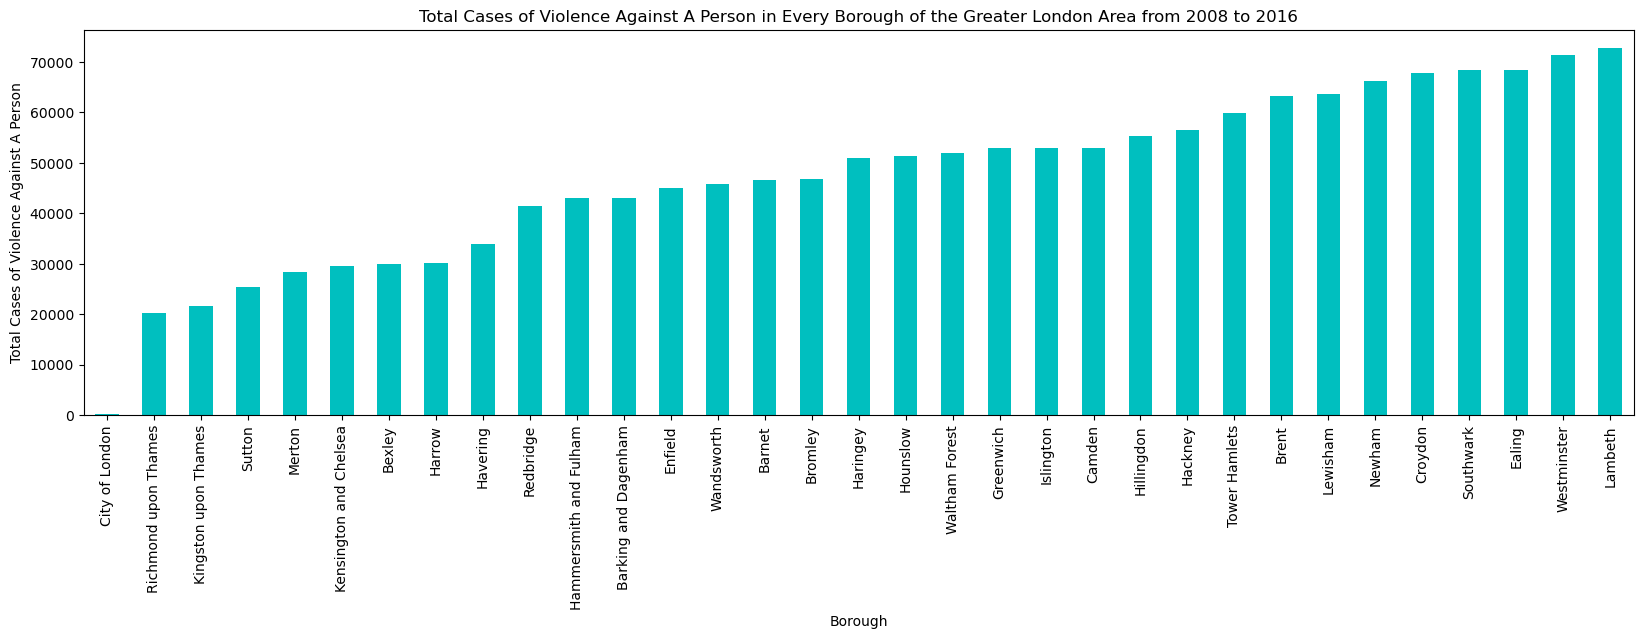

In [20]:
# create the bar chart

violence_ldn.plot(kind="bar",
                 figsize=(20,5),
                 color='c')
plt.title("Total Cases of Violence Against A Person in Every Borough of the Greater London Area from 2008 to 2016")
plt.xlabel("Borough")
plt.ylabel("Total Cases of Violence Against A Person")

### **Folium**

In [21]:
# create a new dataframe of all violence against the person crimes throughout all boroughs in February 2013
# we choose February 2013 arbitrarily to reduce the number of rows, so the map doesn't take too long to load

cond_cat = df_ldn_crime['major_category'] == 'Violence Against the Person'
cond_year = df_ldn_crime['year'] == 2013
cond_mo = df_ldn_crime['month'] == 2

df_ldn_crime_feb_13 = df_ldn_crime[cond_cat & cond_mo & cond_year]
pd.DataFrame(df_ldn_crime_feb_13).head()

borough               major_category       minor_category  value  \
3        Hackney  Violence Against the Person           Harassment      1   
96      Hounslow  Violence Against the Person       Common Assault      1   
272   Hillingdon  Violence Against the Person  Assault with Injury      1   
1821   Southwark  Violence Against the Person           Harassment      1   
2045    Haringey  Violence Against the Person  Assault with Injury      2   

      year  month       date  
3     2013      2 2013-02-01  
96    2013      2 2013-02-01  
272   2013      2 2013-02-01  
1821  2013      2 2013-02-01  
2045  2013      2 2013-02-01

In [22]:
# create X and Y coordinates for each borough, since it currently does not exist in the dataframe

# define the latitude for each borough
def x_coord(row):
    lat = ""
    if row['borough'] == 'Camden':
        lat = '51.5513'
    elif row['borough'] == 'Westminster':
        lat = '51.5141'
    elif row['borough'] == 'Kensington and Chelsea':
        lat = '51.4989'
    elif row['borough'] == 'Lambeth':
        lat = '51.4512'
    elif row['borough'] == 'Croydon':
        lat = '51.3517'
    elif row['borough'] == 'Southwark':
        lat = '51.4774'
    elif row['borough'] == 'Ealing':
        lat = '51.5246' 
    elif row['borough'] == 'Newham':
        lat = '51.5248'
    elif row['borough'] == 'Brent':
        lat = '51.5595'
    elif row['borough'] == 'Lewisham':
        lat = '51.4499'
    elif row['borough'] == 'Barnet':
        lat = '51.6252'
    elif row['borough'] == 'Tower Hamlets':
        lat = '51.5099'
    elif row['borough'] == 'Wandsworth':
        lat = '51.4567'
    elif row['borough'] == 'Enfield':
        lat = '51.6538'
    elif row['borough'] == 'Hackney':
        lat = '51.545'
    elif row['borough'] == 'Haringey':
        lat = '51.6'
    elif row['borough'] == 'Waltham Forest':
        lat = '51.5908'
    elif row['borough'] == 'Islington':
        lat = '51.5416'
    elif row['borough'] == 'Hillingdon':
        lat = '51.5441'
    elif row['borough'] == 'Bromley':
        lat = '51.4039'
    elif row['borough'] == 'Hounslow':
        lat = '51.4746'
    elif row['borough'] == 'Redbridge':
        lat = '51.559'
    elif row['borough'] == 'Greenwich':
        lat = '51.4892'
    elif row['borough'] == 'Hammersmith and Fulham':
        lat = '51.4927'
    elif row['borough'] == 'Barking and Dagenham':
        lat = '51.5607'
    elif row['borough'] == 'Havering':
        lat = '51.5812'
    elif row['borough'] == 'Harrow':
        lat = '51.5898'
    elif row['borough'] == 'Bexley':
        lat = '51.4549'
    elif row['borough'] == 'Merton':
        lat = '51.4014'
    elif row['borough'] == 'Sutton':
        lat = '51.3618'
    elif row['borough'] == 'Richmond upon Thames':
        lat = '51.4479'
    elif row['borough'] == 'Kingston upon Thames':
        lat = '51.4085'
    elif row['borough'] == 'City of London':
        lat = '51.5155'
    return lat

# define the longitude for each borough
def y_coord(row):
    long = ""
    if row['borough'] == 'Camden':
        long = '-0.1662'
    elif row['borough'] == 'Westminster':
        long = '-0.1611'
    elif row['borough'] == 'Kensington and Chelsea':
        long = '-0.1949'
    elif row['borough'] == 'Lambeth':
        long = '-0.11786'
    elif row['borough'] == 'Croydon':
        long = '-0.0813'
    elif row['borough'] == 'Southwark':
        long = '-0.0728'
    elif row['borough'] == 'Ealing':
        long = '-0.3254'
    elif row['borough'] == 'Newham':
        long =  '0.0358'
    elif row['borough'] == 'Brent':
        long = '-0.2625'
    elif row['borough'] == 'Lewisham':
        long = '-0.0169'
    elif row['borough'] == 'Barnet':
        long = '-0.1517'
    elif row['borough'] == 'Tower Hamlets':
        long = '-0.0059'
    elif row['borough'] == 'Wandsworth':
        long = '-0.191'
    elif row['borough'] == 'Enfield':
        long = '-0.0799'
    elif row['borough'] == 'Hackney':
        long = '-0.0553'
    elif row['borough'] == 'Haringey':
        long = '-0.1119'
    elif row['borough'] == 'Waltham Forest':
        long = '-0.0134'
    elif row['borough'] == 'Islington':
        long = '-0.1022'
    elif row['borough'] == 'Hillingdon':
        long = '-0.476'
    elif row['borough'] == 'Bromley':
        long = '0.0198'
    elif row['borough'] == 'Hounslow':
        long = '-0.368'
    elif row['borough'] == 'Redbridge':
        long = '0.0741'
    elif row['borough'] == 'Greenwich':
        long = '0.0648'
    elif row['borough'] == 'Hammersmith and Fulham':
        long = '-0.2339'
    elif row['borough'] == 'Barking and Dagenham':
        long = '0.1557'
    elif row['borough'] == 'Havering':
        long = '0.1837'
    elif row['borough'] == 'Harrow':
        long = '-0.3346'
    elif row['borough'] == 'Bexley':
        long = '0.1505'
    elif row['borough'] == 'Merton':
        long = '-0.1958'
    elif row['borough'] == 'Sutton':
        long = '-0.1945'
    elif row['borough'] == 'Richmond upon Thames':
        long = '-0.326'
    elif row['borough'] == 'Kingston upon Thames':
        long = '-0.3064'
    elif row['borough'] == 'City of London':
        long = '-0.0922'
    return long

# insert the 'x' and 'y' from if function above to the dataframe
df_ldn_crime_feb_13['x'] = df_ldn_crime_feb_13.apply(x_coord, axis=1)
df_ldn_crime_feb_13['y'] = df_ldn_crime_feb_13.apply(y_coord, axis=1)

# display the resulting dataframe
df_ldn_crime_feb_13

C:\Users\nadani2\AppData\Local\Temp/ipykernel_23284/3144975307.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ldn_crime_feb_13['x'] = df_ldn_crime_feb_13.apply(x_coord, axis=1)
C:\Users\nadani2\AppData\Local\Temp/ipykernel_23284/3144975307.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ldn_crime_feb_13['y'] = df_ldn_crime_feb_13.apply(y_coord, axis=1)


borough               major_category  \
3                     Hackney  Violence Against the Person   
96                   Hounslow  Violence Against the Person   
272                Hillingdon  Violence Against the Person   
1821                Southwark  Violence Against the Person   
2045                 Haringey  Violence Against the Person   
...                       ...                          ...   
3416938  Barking and Dagenham  Violence Against the Person   
3417242  Barking and Dagenham  Violence Against the Person   
3418528            Wandsworth  Violence Against the Person   
3418531             Southwark  Violence Against the Person   
3418605               Lambeth  Violence Against the Person   

              minor_category  value  year  month       date        x         y  
3                 Harassment      1  2013      2 2013-02-01   51.545   -0.0553  
96            Common Assault      1  2013      2 2013-02-01  51.4746    -0.368  
272      Assault with Injury      1  2013      2 2013-02-01  51.5441    -0.476  
1821              Harassment      1  2013      2 2013-02-01  51.4774   -0.0728  
2045     Assault with Injury      2  2013      2 2013-02-01     51.6   -0.1119  
...                      ...    ...   ...    ...        ...      ...       ...  
3416938  Assault with Injury      1  2013      2 2013-02-01  51.5607    0.1557  
3417242  Assault with Injury      2  2013      2 2013-02-01  51.5607    0.1557  
3418528           Harassment      2  2013      2 2013-02-01  51.4567    -0.191  
3418531       Common Assault      1  2013      2 2013-02-01  51.4774   -0.0728  
3418605       Common Assault      2  2013      2 2013-02-01  51.4512  -0.11786  

[6653 rows x 9 columns]

In [23]:
# create folium to display a map of the distribution of those cases in the dataframe above

# define inital location, zoom degree, and the map style
ldn_loc = [51.52496032009672, -0.1608495098032791]
map_ldn_vio = folium.Map(location=ldn_loc, zoom_start=10, tiles = "Stamen Terrain")

# create marker grouping
cluster_crime = plugins.MarkerCluster()

for crime in zip(df_ldn_crime_feb_13['x'], df_ldn_crime_feb_13['y']):
    x, y = crime
    loc = [x, y]
    marker_crime = folium.CircleMarker(loc)
    cluster_crime.add_child(marker_crime)
    
map_ldn_vio.add_child(cluster_crime)

# add boundary of London boroughs to the map
ldn_bor_boundary = 'upload/assgn1/CamdenCyclists-33-london-borough-boundaries.geojson'
folium.GeoJson(ldn_bor_boundary, name="geojson").add_to(map_ldn_vio)

# display folium map
title = 'Map of Distribution of Violence Against A Person Cases in London, Case Study: February 2013'
title_fol = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(title)
map_ldn_vio.get_root().html.add_child(folium.Element(title_fol))
map_ldn_vio

**Analysis #3:**
- The trend is pretty much similar with the entire cases (see Question #2).
- Based on the bar chart, the touristy areas such as Westminster, Camden, and Kensington and Chelsea shows relatively higher cases compared to other boroughs with similar population or density that are not as well-known.
- According to the map, the number of cases also increases towards the inner London area.

---

**Question #4:**
- Let's look at the more touristy areas in inner London. How does the number of total criminal cases from 2008 to 2016 map out in **Westminster, Camden, and Kensington and Chelsea**?

### **Pie Chart**

In [24]:
# create new dataframe for those 3 boroughs

df_cwck = df_ldn_crime[(df_ldn_crime['borough'].isin(['Camden', 'Kensington and Chelsea', 'Westminster']))]
df_cwck.reset_index(inplace=True)
df_cwck.head()

index                 borough      major_category  \
0     24             Westminster  Theft and Handling   
1     25                  Camden             Robbery   
2     27  Kensington and Chelsea             Robbery   
3     35             Westminster  Theft and Handling   
4     42  Kensington and Chelsea               Drugs   

                           minor_category  value  year  month       date  
0  Motor Vehicle Interference & Tampering      1  2014      4 2014-04-01  
1                       Personal Property      1  2011     11 2011-11-01  
2                       Personal Property      1  2015      7 2015-07-01  
3                Theft From Motor Vehicle      3  2013      2 2013-02-01  
4                     Possession Of Drugs      1  2009      1 2009-01-01

In [25]:
# drop the 'index' column

df_cwck.drop(columns=["index"], inplace=True)
df_cwck.head()

C:\Users\nadani2\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


borough      major_category  \
0             Westminster  Theft and Handling   
1                  Camden             Robbery   
2  Kensington and Chelsea             Robbery   
3             Westminster  Theft and Handling   
4  Kensington and Chelsea               Drugs   

                           minor_category  value  year  month       date  
0  Motor Vehicle Interference & Tampering      1  2014      4 2014-04-01  
1                       Personal Property      1  2011     11 2011-11-01  
2                       Personal Property      1  2015      7 2015-07-01  
3                Theft From Motor Vehicle      3  2013      2 2013-02-01  
4                     Possession Of Drugs      1  2009      1 2009-01-01

In [26]:
# create new series of total crimes in the 3 areas

total_maj_crime_cwkc = df_cwck.groupby('major_category')['value'].sum()
total_maj_crime_cwkc

major_category
Burglary                        72214
Criminal Damage                 48726
Drugs                           70420
Fraud or Forgery                  481
Other Notifiable Offences       12208
Robbery                         29782
Sexual Offences                   119
Theft and Handling             514176
Violence Against the Person    154030
Name: value, dtype: int32

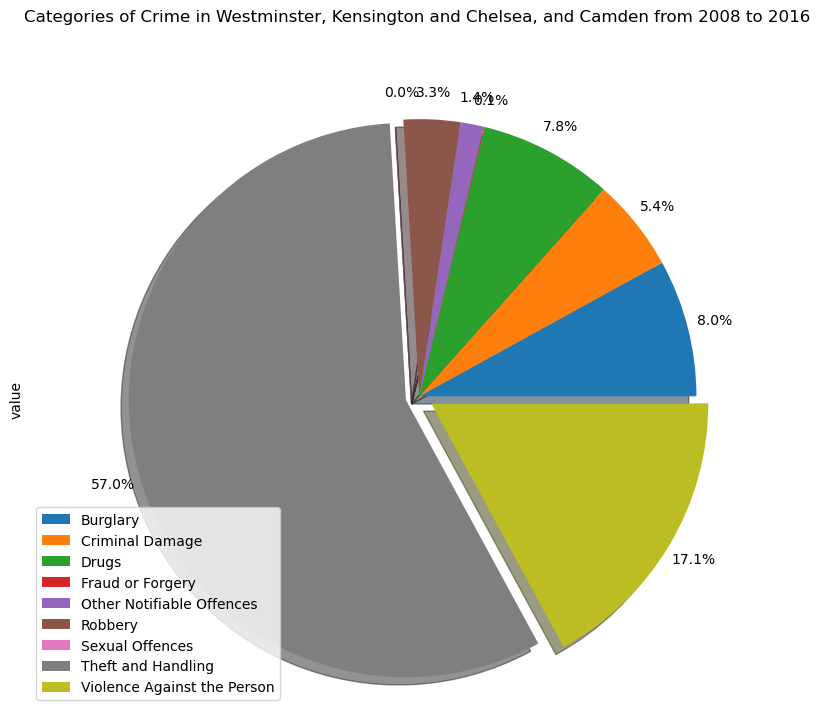

In [27]:
# create pie chart of the series above

total_maj_crime_cwkc.plot(kind="pie",
                     autopct='%1.1f%%',
                     pctdistance=1.1,
                     labels=None,
                     shadow=True,
                     explode=[0,0,0,0,0,0,0,0.05,0.05],
                    figsize=(10,8)
                    )

plt.title("Categories of Crime in Westminster, Kensington and Chelsea, and Camden from 2008 to 2016",
         y=1.1
         )
plt.legend(total_maj_crime_cwkc.index, loc="lower left")
plt.axis('equal')
plt.show()

**Analysis #4:**
- The distribution is pretty much similar with the crime cases throughout London (see Question #1), where the two most common crimes are **theft and handling** and **violence agains the person**.

---

**Question #5:**
- What the distribution of each major crime in each borough of **Westminster, Camden, and Kensington and Chelsea**?

In [28]:
# create new dataframe for Camden that includes all major category crime and the summation of each major crime category from 2008-2016

cam = df_ldn_crime['borough'] == 'Camden'
cam_all_crime = df_ldn_crime[cam]
df_cam_all_crime = pd.DataFrame(cam_all_crime.groupby(['major_category'])['value'].sum()).T
df_cam_all_crime['borough'] = ['Camden']
df_cam_all_crime.set_index('borough')
df_cam_all_crime

major_category  Burglary  Criminal Damage  Drugs  Fraud or Forgery  \
value              27939            18482  21816               123   

major_category  Other Notifiable Offences  Robbery  Sexual Offences  \
value                                3857     9286               36   

major_category  Theft and Handling  Violence Against the Person borough  
value                       140596                        53012  Camden

In [29]:
# create new dataframe for Westminster that includes all major category crime and the summation of each major crime category from 2008-2016

wes = df_ldn_crime['borough'] == 'Westminster'
wes_all_crime = df_ldn_crime[wes]
df_wes_all_crime = pd.DataFrame(wes_all_crime.groupby(['major_category'])['value'].sum()).T
df_wes_all_crime['borough'] = ['Westminster']
df_wes_all_crime.set_index('borough')
df_wes_all_crime

major_category  Burglary  Criminal Damage  Drugs  Fraud or Forgery  \
value              29295            20405  34031               273   

major_category  Other Notifiable Offences  Robbery  Sexual Offences  \
value                                6148    15752               59   

major_category  Theft and Handling  Violence Against the Person      borough  
value                       277617                        71448  Westminster

In [30]:
# create new dataframe for Kensington & Chelsea that includes all major category crime and the summation of each major crime category from 2008-2016

ken = df_ldn_crime['borough'] == 'Kensington and Chelsea'
ken_all_crime = df_ldn_crime[wes]
df_ken_all_crime = pd.DataFrame(ken_all_crime.groupby(['major_category'])['value'].sum()).T
df_ken_all_crime['borough'] = ['Kensington and Chelsea']
df_ken_all_crime.set_index('borough')
df_ken_all_crime

major_category  Burglary  Criminal Damage  Drugs  Fraud or Forgery  \
value              29295            20405  34031               273   

major_category  Other Notifiable Offences  Robbery  Sexual Offences  \
value                                6148    15752               59   

major_category  Theft and Handling  Violence Against the Person  \
value                       277617                        71448   

major_category                 borough  
value           Kensington and Chelsea

In [31]:
# concatenate the three dataframes above

df_cwck_maj_crime = pd.concat([df_cam_all_crime, df_wes_all_crime, df_ken_all_crime])
df_cwck_maj_crime.set_index('borough', inplace=True)
df_cwck_maj_crime

major_category          Burglary  Criminal Damage  Drugs  Fraud or Forgery  \
borough                                                                      
Camden                     27939            18482  21816               123   
Westminster                29295            20405  34031               273   
Kensington and Chelsea     29295            20405  34031               273   

major_category          Other Notifiable Offences  Robbery  Sexual Offences  \
borough                                                                       
Camden                                       3857     9286               36   
Westminster                                  6148    15752               59   
Kensington and Chelsea                       6148    15752               59   

major_category          Theft and Handling  Violence Against the Person  
borough                                                                  
Camden                              140596                        53012  
Westminster                         277617                        71448  
Kensington and Chelsea              277617                        71448

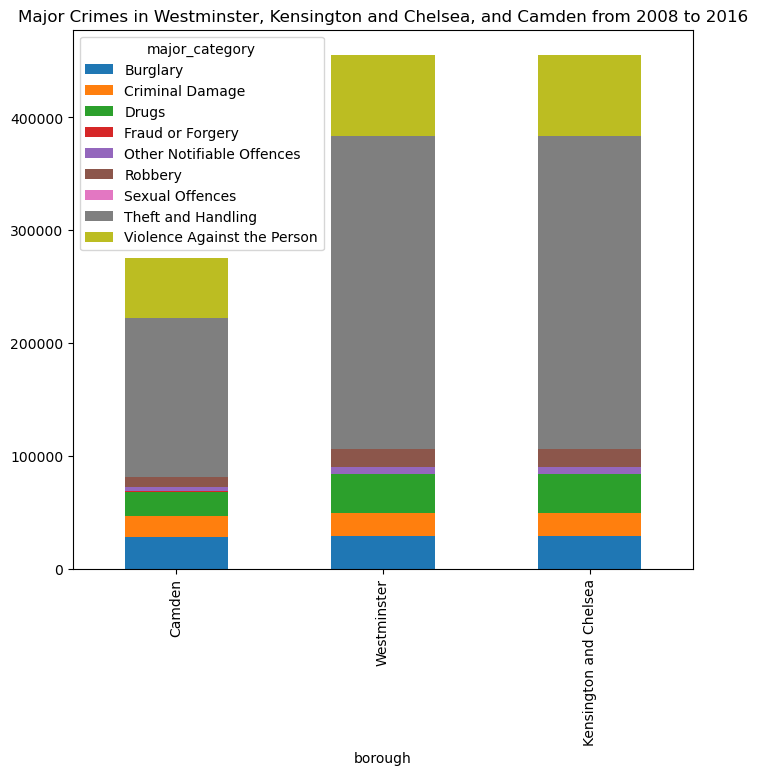

In [32]:
# create a stacked bar graph to see the distribution of all major crime categories in each of the 3 boroughs

df_cwck_maj_crime.plot(kind="bar",
                       stacked=True,
                      figsize=(8,7))
plt.title("Major Crimes in Westminster, Kensington and Chelsea, and Camden from 2008 to 2016",
         y=1
         )
plt.show()

**Analysis #5:**
- In each borough, the proportion of crime cases is rather similar. The two most prevalent crimes are **theft and handling** and **violence against the person**, similar to general distribution throughout London (see Question #1).

---

## **Preliminary Conclusion from Overview Analysis**
- From the plots above, we can see that **Westminster, Kensington & Chelsea, and Camden** areas are worth observing deeper considering that these are the most touristy areas in London which attract more visitors than any other borough, which possibly lead to why these boroughs have relatively higher crime cases compared to other boroughs with similar population or density.
- From tourist standpoint, it's also worth noting that **violence against a person** occurs quite frequently, since it might affect tourists. Meanwhile for theft and handling, because this category includes all types of thefts including Motor Vehicle Interference & Tampering, Theft From Motor Vehicle, Theft From Shops, Other Theft, Theft/Taking of Pedal Cycle which may not directly affect tourists as much as Violence Against A Person, we will not focus on this category for the next part of the analysis.
---

## **II. 2. Violence Against A Person in Westminster, Kensington and Chelsea, and Camden Boroughs**

**Question #6:**
- In Westminster, Kensington and Chelsea, and Camden, how is the distribution of each minor category crime within violence against a person?

### __WordCloud__

In [33]:
# create new dataframe for total of each minor category within 'violence against the person' for Camden, Westminster, & Kensington and Chelsea

cwck_violence = df_cwck[df_cwck['major_category'] == 'Violence Against the Person']
df_cwck_violence = pd.DataFrame(cwck_violence.groupby(['minor_category'])['value'].sum())
df_cwck_violence

value
minor_category            
Assault with Injury  42636
Common Assault       41276
Harassment           47821
Murder                  60
Offensive Weapon      3736
Other violence        6135
Wounding/GBH         12366

In [34]:
# to create wordcloud, first, we need to measure how many values of all 'violence agains the person' in the 3 boroughs

total_violence = df_cwck_violence['value'].sum()
total_violence

154030

(-0.5, 999.5, 499.5, -0.5)

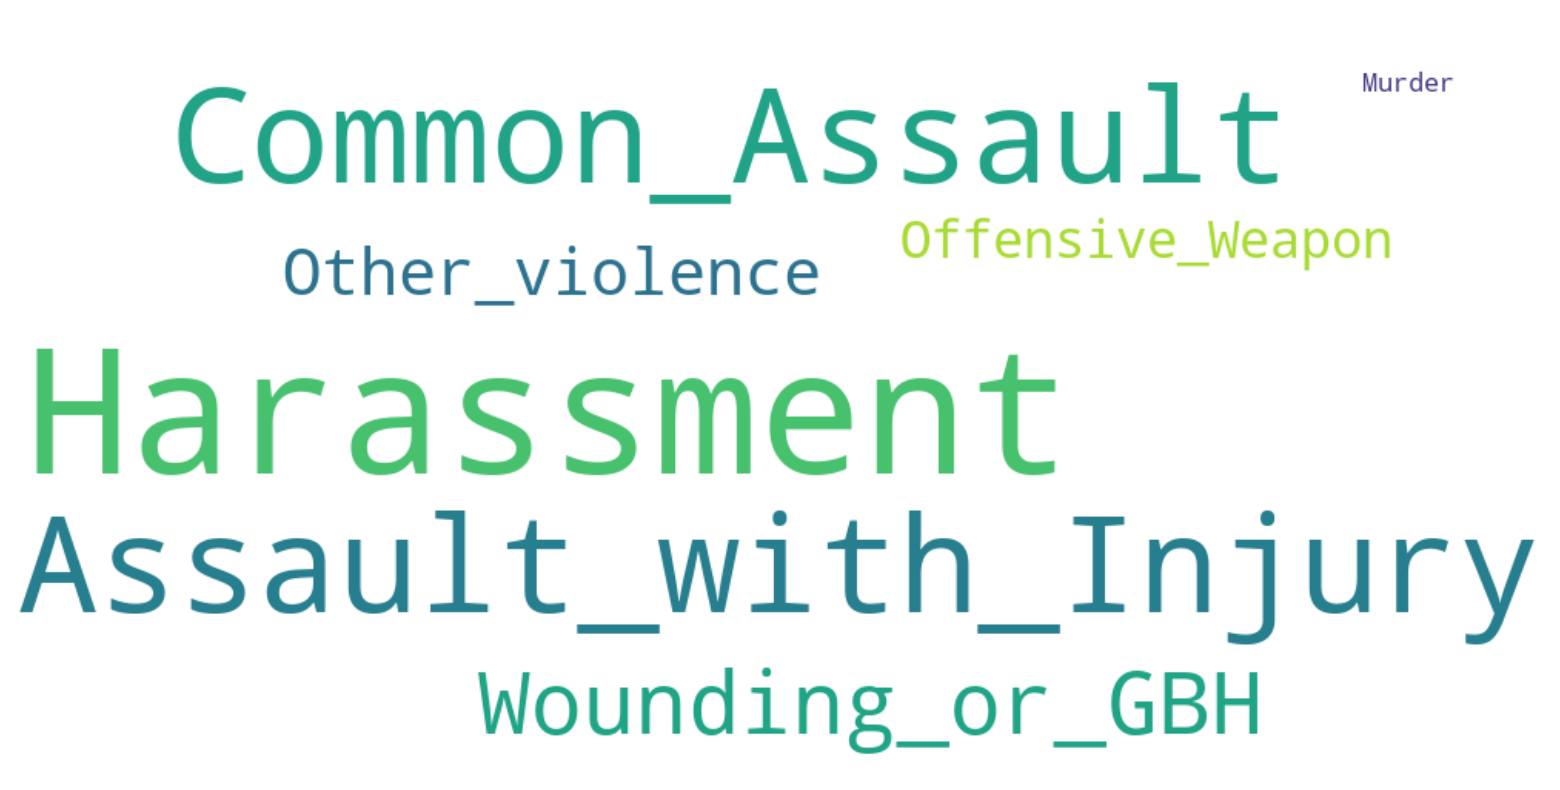

In [35]:
# note that there are 154030 values
# to make it more comparable since e.g. murder only shows up 60 times meanwhile harassment is >47000 times, we will scale the ratio using max_words

max_words = 10000 # this is to change the 'ratio' of the maximum number a minor_category can be considered

violence_minor_cat = ""

# calculate with ratio, how many times each country shows up

for category in df_cwck_violence.index.values:
        
    min_cat = category.replace(" ", "_")
    min_cat = min_cat.replace(",", "")
    min_cat = min_cat.replace("(", "")
    min_cat = min_cat.replace(")", "")
    min_cat = min_cat.replace("''", "")
    min_cat = min_cat.replace("/", "_or_")
        
    repeat = int(df_cwck_violence.loc[category, 'value'] / float(total_violence) * max_words)
        
    violence_minor_cat = violence_minor_cat + (min_cat + " ") * repeat
        
# create the wordcloud
wc_violence_cwck = WordCloud(background_color="white",
                    width=1000,
                    height=500,
                    collocations=False, # so that the keywords don't show up twice
                    )
wc_violence_cwck.generate(violence_minor_cat)

fig_wc_violence_cwck = plt.figure()
fig_wc_violence_cwck.set_figwidth(20)
fig_wc_violence_cwck.set_figheight(10)

plt.imshow(wc_violence_cwck, interpolation="bilinear")
plt.axis("off")

**Analysis #6:**
- Harassment is the highest type of violence against a person in the 3 boroughs, followed by assaults, both common assault and assault with injury.
- Murder and offensive weapon occurred least frequently.

---

**Question #7:**
- What is the monthly trend of frequency of violence against a person in Camden, Westminster, & Kensington and Chelsea from 2008 to 2016?

### **Stacked Area Chart**

In [36]:
# we will use the following the dataframe

cwck_violence.head()

borough               major_category  minor_category  \
6                   Camden  Violence Against the Person      Harassment   
9   Kensington and Chelsea  Violence Against the Person  Common Assault   
17             Westminster  Violence Against the Person  Common Assault   
18             Westminster  Violence Against the Person  Common Assault   
24  Kensington and Chelsea  Violence Against the Person    Wounding/GBH   

    value  year  month       date  
6       1  2012     12 2012-12-01  
9       3  2014      9 2014-09-01  
17     10  2013      1 2013-01-01  
18      1  2016      2 2016-02-01  
24      1  2008     12 2008-12-01

In [37]:
# create new dataframe of total violence against a person per month from 2008 to 2016 for Camden

cam_violence_monthly = cwck_violence[cwck_violence['borough'] == 'Camden']
df_cam_violence_monthly = pd.DataFrame(cam_violence_monthly.groupby(['date'])['value'].sum())
df_cam_violence_monthly.rename(columns={'value': 'Camden'}, inplace=True)
df_cam_violence_monthly.head()

Camden
date              
2008-01-01     413
2008-02-01     437
2008-03-01     501
2008-04-01     484
2008-05-01     539

In [38]:
# create new dataframe of total violence against a person per month from 2008 to 2016 for Westminster

wes_violence_monthly = cwck_violence[cwck_violence['borough'] == 'Westminster']
df_wes_violence_monthly = pd.DataFrame(wes_violence_monthly.groupby(['date'])['value'].sum())
df_wes_violence_monthly.rename(columns={'value': 'Westminster'}, inplace=True)
df_wes_violence_monthly.head()

Westminster
date                   
2008-01-01          554
2008-02-01          473
2008-03-01          493
2008-04-01          464
2008-05-01          518

In [39]:
# create new dataframe of total violence against a person per month from 2008 to 2016 for Kensington & Chelsea

ken_violence_monthly = cwck_violence[cwck_violence['borough'] == 'Kensington and Chelsea']
df_ken_violence_monthly = pd.DataFrame(ken_violence_monthly.groupby(['date'])['value'].sum())
df_ken_violence_monthly.rename(columns={'value': 'Kensington and Chelsea'}, inplace=True)
df_ken_violence_monthly.head()

Kensington and Chelsea
date                              
2008-01-01                     191
2008-02-01                     219
2008-03-01                     244
2008-04-01                     206
2008-05-01                     264

In [40]:
# concatenate the 3 previous dataframes

df_cwck_vio = pd.concat([df_cam_violence_monthly, df_wes_violence_monthly, df_ken_violence_monthly], axis=1)
df_cwck_vio.head()

Camden  Westminster  Kensington and Chelsea
date                                                   
2008-01-01     413          554                     191
2008-02-01     437          473                     219
2008-03-01     501          493                     244
2008-04-01     484          464                     206
2008-05-01     539          518                     264

Text(0, 0.5, 'Total')

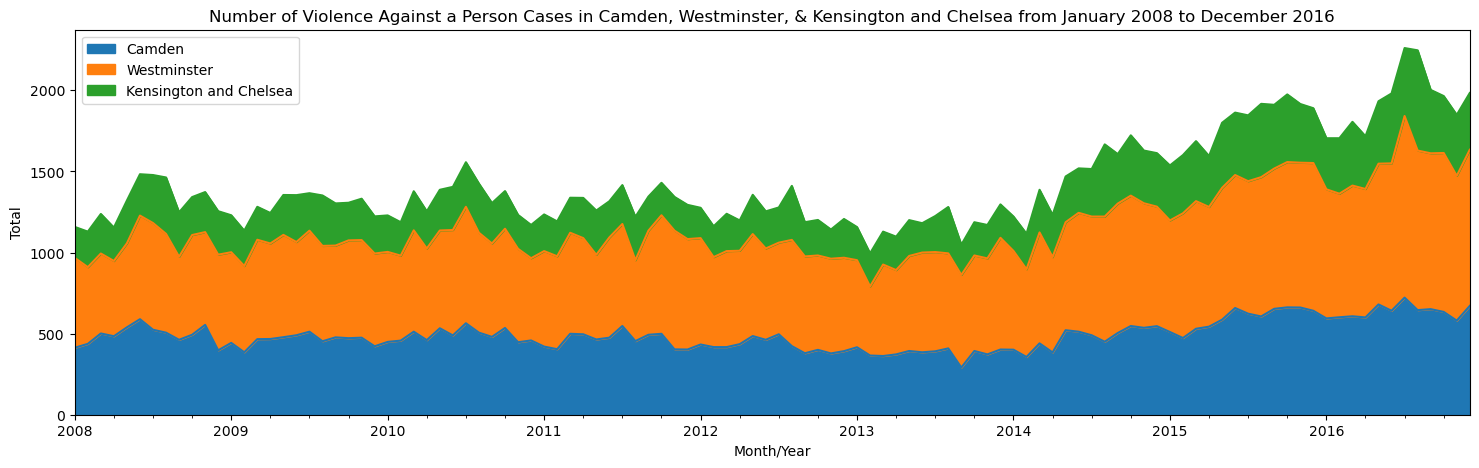

In [52]:
# plot the dataframe above into a stacked area chart

df_cwck_vio.plot(kind='area',
                 figsize=(18,5),
                )

plt.title("Number of Violence Against a Person Cases in Camden, Westminster, & Kensington and Chelsea from January 2008 to December 2016")
plt.xlabel("Month/Year")
plt.ylabel("Total")

### **Scatter Plot**

Text(0.5, 0.98, "Relationship of 'Violence Against the Person' Cases between Camden, Westminster, and Kensington/Chelsea Boroughs")

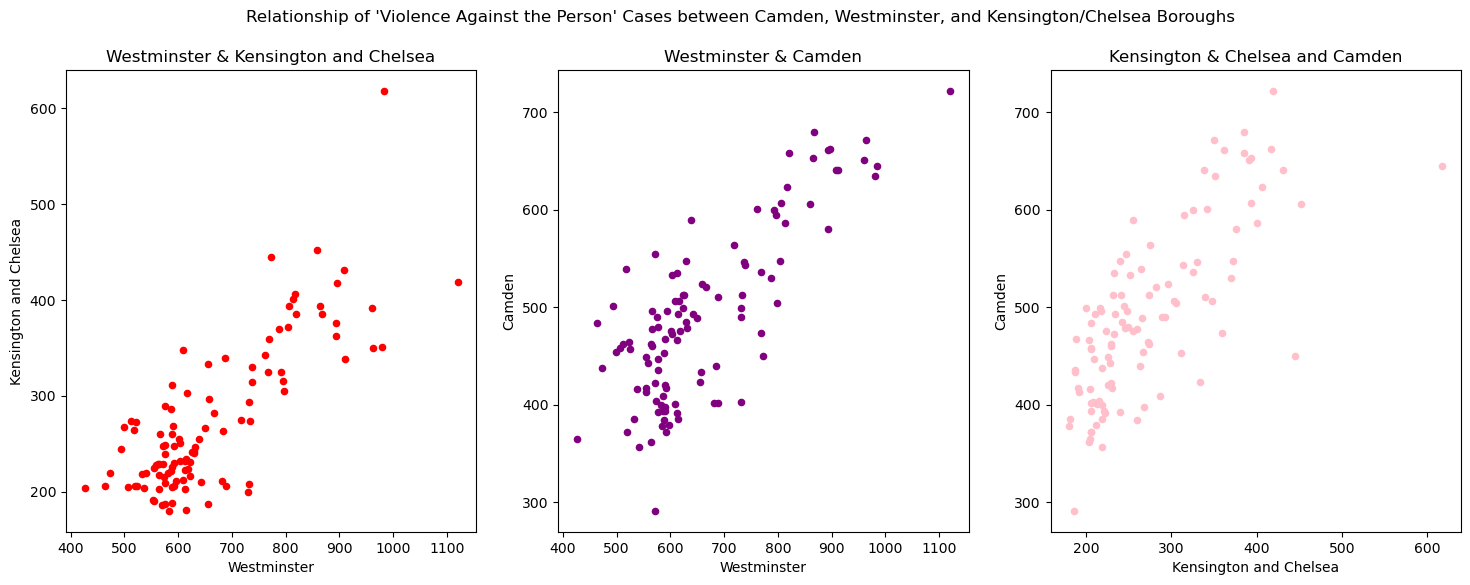

In [53]:
# create background figure
cwck_scatter_bg = plt.figure(figsize=(18,6))

# add subplots to figure
ax1 = cwck_scatter_bg.add_subplot(1,3,1)
ax2 = cwck_scatter_bg.add_subplot(1,3,2)
ax3 = cwck_scatter_bg.add_subplot(1,3,3)

# insert scatter plot to subplot 1 (left)
w_vs_kc_scatter = df_cwck_vio.plot(kind='scatter',
                 x='Westminster',
                 y='Kensington and Chelsea',
                color='red',
                 ax=ax1)
w_vs_kc_scatter.set_title('Westminster & Kensington and Chelsea')

# insert scatter plot to subplot 2 (centre)
w_vs_cam_scatter = df_cwck_vio.plot(kind='scatter',
                 x='Westminster',
                 y='Camden',
                color='purple',
                 ax=ax2)
w_vs_cam_scatter.set_title('Westminster & Camden')

# insert scatter plot to subplot 3 (right)
kc_vs_cam_scatter = df_cwck_vio.plot(kind='scatter',
                 x='Kensington and Chelsea',
                 y='Camden',
                color='pink',
                 ax=ax3)
kc_vs_cam_scatter.set_title('Kensington & Chelsea and Camden')

# insert general title
cwck_scatter_bg.suptitle("Relationship of 'Violence Against the Person' Cases between Camden, Westminster, and Kensington/Chelsea Boroughs")

**Analysis 7:**
- Based on the stacked area chart, there is an increasing trend from 2014 to 2016 across all boroughs, especially in Westminster, followed by Kensington and Chelsea, and lastly Camden where the increase was not too significant.
- There seems to be a relationship between the number of crimes within each borough as seen from the scatter plots that show a general trend, possibly a linear one (although in this assignment, we did not perform the regression)

---

**Question 8:**
- What are other information that can be seen from the distribution of **violence against a person** in Camden, Westminster, & Kensington and Chelsea?

### **Non-Stacked Bar Chart, Box Plot, & Histogram**

In [43]:
# create new dataframe of total violence against a person per year from 2008 to 2016 for Camden

cam_violence_yearly = cwck_violence[cwck_violence['borough'] == 'Camden']
df_cam_violence_yearly = pd.DataFrame(cam_violence_monthly.groupby(['year'])['value'].sum())
df_cam_violence_yearly.rename(columns={'value': 'Camden'}, inplace=True)
df_cam_violence_yearly.head()

Camden
year        
2008    5899
2009    5540
2010    5890
2011    5556
2012    5117

In [44]:
# create new dataframe of total violence against a person per year from 2008 to 2016 for Westminster

wes_violence_yearly = cwck_violence[cwck_violence['borough'] == 'Westminster']
df_wes_violence_yearly = pd.DataFrame(wes_violence_monthly.groupby(['year'])['value'].sum())
df_wes_violence_yearly.rename(columns={'value': 'Westminster'}, inplace=True)
df_wes_violence_yearly.head()

Westminster
year             
2008         6697
2009         7053
2010         7127
2011         7432
2012         7130

In [45]:
# create new dataframe of total violence against a person per year from 2008 to 2016 for Kensington & Chelsea

ken_violence_yearly = cwck_violence[cwck_violence['borough'] == 'Kensington and Chelsea']
df_ken_violence_yearly = pd.DataFrame(ken_violence_monthly.groupby(['year'])['value'].sum())
df_ken_violence_yearly.rename(columns={'value': 'Kensington and Chelsea'}, inplace=True)
df_ken_violence_yearly.head()

Kensington and Chelsea
year                        
2008                    3046
2009                    2890
2010                    2891
2011                    2737
2012                    2664

In [46]:
# concatenate the 3 previous dataframes

df_cwck_vio_yearly = pd.concat([df_cam_violence_yearly, df_wes_violence_yearly, df_ken_violence_yearly], axis=1)
df_cwck_vio_yearly.head()

Camden  Westminster  Kensington and Chelsea
year                                             
2008    5899         6697                    3046
2009    5540         7053                    2890
2010    5890         7127                    2891
2011    5556         7432                    2737
2012    5117         7130                    2664

Text(0.5, 0.98, 'Number of Violence Against a Person Cases in Camden, Westminster, & Kensington and Chelsea from January 2008 to December 2016')

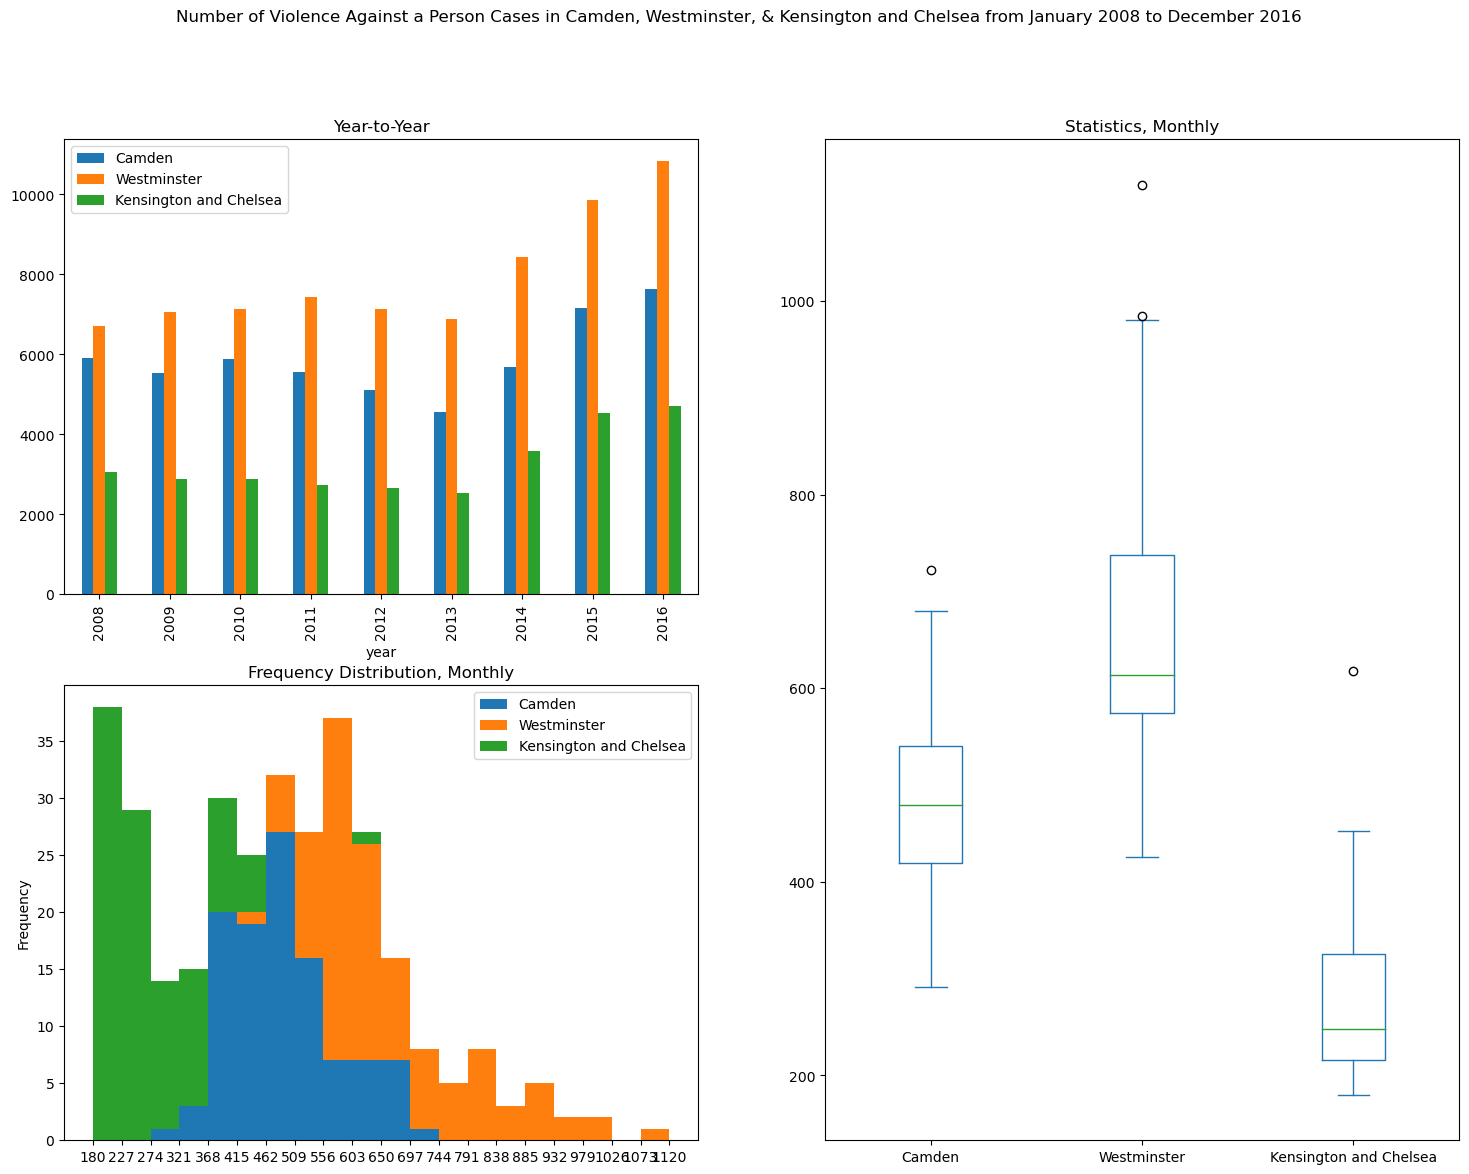

In [47]:
# combining bar chart, histogram, & boxplot into one figure

# create background figure
combined_cwck = plt.figure(figsize=(18,13))

# add subplots to figure
ax1 = combined_cwck.add_subplot(2,2,1)
ax2 = combined_cwck.add_subplot(1,2,2)
ax3 = combined_cwck.add_subplot(2,2,3)

# for every subplot, fill with different plots

# plot 1 (top-left): insert bar graph
cwck_vio_bar = df_cwck_vio_yearly.plot(kind='bar',
                                       stacked=False,
                                      ax = ax1)
cwck_vio_bar.set_title("Year-to-Year")

# plot 2 (right): insert boxplot
cwck_vio_box = df_cwck_vio.plot(kind="box", ax=ax2)
cwck_vio_box.set_title("Statistics, Monthly")

# plot 3 (bottom-left): insert histogram
bin_no = 20
count, bin_edges = np.histogram(df_cwck_vio, bin_no)

cwck_vio_hist = df_cwck_vio.plot(kind="hist",
            xticks=bin_edges,
            bins=bin_no,
            stacked=True,
            ax = ax3
                )
cwck_vio_hist.set_title("Frequency Distribution, Monthly")

# artist layer to add title
combined_cwck.suptitle("Number of Violence Against a Person Cases in Camden, Westminster, & Kensington and Chelsea from January 2008 to December 2016")

**Analysis 8:**
- Based on the bar chart, number of cases of violence against a person in the 3 boroughs saw similar trend that was generally decreasing at least from 2011-2013, then suddenly displayed a major growth in 2014-2016.
- Based on the histogram, Kensington & Chelsea saw the fewest number of cases monthly, mostly around 180-227 cases. Camden's cases were moderate and mostly around 462-509 cases, meanwhile Westminster saw the most number of monthly cases with mostly around 556-603 cases.
- Based on the box plot, the distribution of 50% of monthly cases were more similar in Camden and Kensington/Chelsea, compared to Westminster. Westminster also saw the most significant outlier compared to the other two.

---

# **Final Conclusion**
- Based on the general distribution of all major crime categories across all boroughs in London from 2008 to 2016, the crime categories that occurred most often were theft and handling and violence against a person. Violence against a person will be focused on this assignment because it does not only affect residents, but also tourists.
- When observed per borough, boroughs that are typically most visited by tourists such as Westminster, Camden, and Kensington & Chelsea also have typically higher cases of all crimes, including violence against the person, compared to other boroughs with similar population or density. This is possibly because these areas attract more visitors therefore more crime cases were observed in these boroughs.
- Within the three boroughs, Westminster saw the most crime cases as well as violence against the person cases, followed by Camden, then Kensington and Chelsea. These orders also reflect the number of populations in the three boroughs, therefore it is likely that there is a relationship between the number of crime cases vs. the population number.
- There is possibly a relationship between the number of violence against a person observed in one of the three boroughs with the other, but to see the correlation would require regression to find a correlation coefficient, which is not covered in this assignment.
---